In [38]:
# Units
from brian2 import *
print(20*volt)
print(1000*amp)
print(1e6*volt)
print(1000*namp)
print(10*nA*5*Mohm)


20. V
1. kA
1. MV
1. uA
50. mV


In [39]:
# Simple model
start_scope()
tau = 10*ms
eqs = 'dv/dt = (1-v)/tau : 1' # Solution: v = 1 - exp(-t/tau)
G = NeuronGroup(1, eqs)
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]
Before v = 0.0
After v = 0.9999546000702376


Text(0, 0.5, 'v')

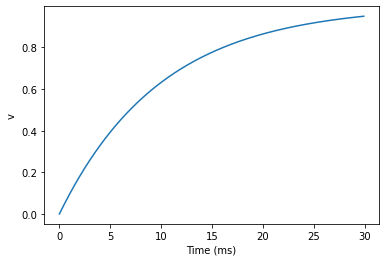

In [40]:
# V graph
start_scope()
G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)
run(30*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

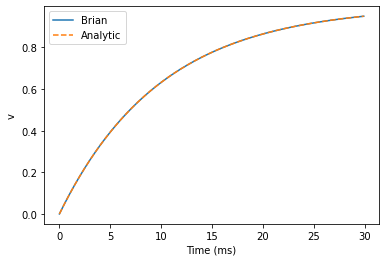

In [41]:
# V graph with expected behaviour
start_scope()
G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0) # Neuron 0
run(30*ms)
plot(M.t/ms, M.v[0], label='Brian') # Brian simulation
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic') # Expected behaviour
xlabel('Time (ms)')
ylabel('v')
legend()

Text(0, 0.5, 'v')

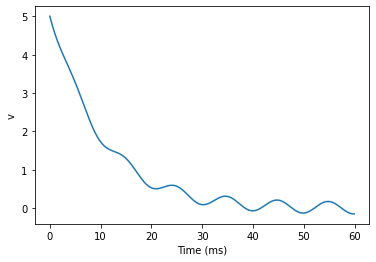

In [42]:
# Euler method
start_scope()
tau = 10*ms
eqs = 'dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1'
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0) # Neuron 0
G.v = 5 # Initial value
run(60*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'v')

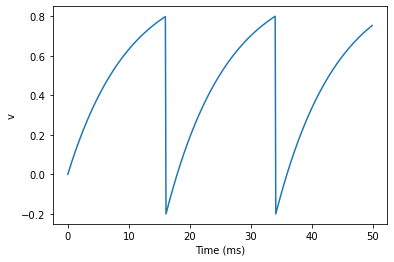

In [45]:
# Spikes
start_scope()
tau = 10*ms
eqs = 'dv/dt = (1-v)/tau : 1' # Solution: v = 1 - exp(-t/tau)
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact') # Spike fired at v>0.8 and reset
M = StateMonitor(G, 'v', record=0) # Neuron 0
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

In [46]:
# Spike monitor
start_scope()
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact') # Spike fired at v>0.8 and reset
spikemon = SpikeMonitor(G)
run(50*ms)
print('Spike times: %s' % spikemon.t[:])

Spike times: [16.  32.1 48.2] ms


Text(0, 0.5, 'v')

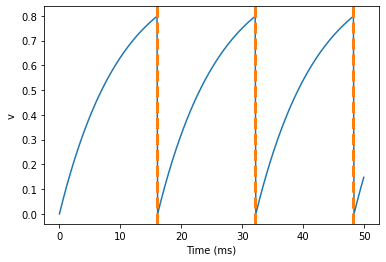

In [47]:
# Spike graph
start_scope()
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact') # Spike fired at v>0.8 and reset
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)
run(50*ms)
plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'v')

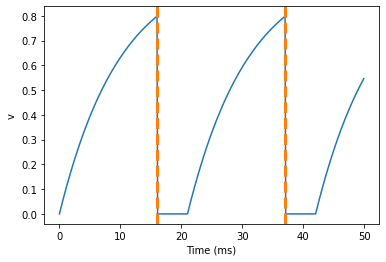

In [50]:
# Refractoriness
start_scope()
tau = 10*ms
eqs = 'dv/dt = (1-v)/tau : 1 (unless refractory)' # Keep v constant during refractory period
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', refractory=5*ms, method='exact')
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)
run(50*ms)
plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'Neuron index')

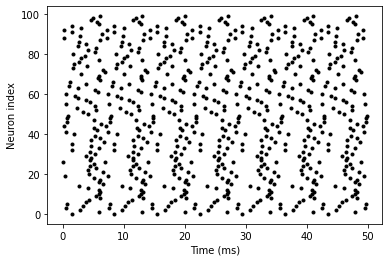

In [56]:
# Multiple neurons raster plot
start_scope()
N = 100
tau = 10*ms
eqs = 'dv/dt = (2-v)/tau : 1'
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()' # 0 to 1 random initial value for each neuron
spikemon = SpikeMonitor(G)
run(50*ms)
plot(spikemon.t/ms, spikemon.i, '.k') # Plot spikes of neuron 0 on line 0 etc.
xlabel('Time (ms)')
ylabel('Neuron index')